In [1]:
import os 
#data_location = input("Enter Path Location of data")
os.chdir("/home/mitchell/Documents/masters/masters/scripts/")
import galaxy_pairs
import cmb
os.chdir("/home/mitchell/Documents/masters/masters/data")
cwd = os.getcwd()
print(cwd)

pywtl packages could not be imported.  This may break plotting code.
FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)
/home/mitchell/Documents/masters/masters/data


In [2]:
import numpy as np
import scipy as sp
import astropy as ap
import glob
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.constants as const
from astropy import constants as ap_const
import scipy.ndimage 
import PIL
import sptpol_software as sps
from astropy.io import fits
from astropy.cosmology import Planck15
from astropy import units as u
import scipy.spatial.distance as dist
print(Planck15)
cosmo= Planck15

FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)


In [3]:
from sptpol_software.util.tools import stat
from sptpol_software.observation import *
import sptpol_software.observation as obs
import sptpol_software as sps
import sptpol_software.observation.sky
from sptpol_software.util import files

In [4]:
T_cmb = 2.725
freqs_ghz = [93.2000,147.700]
beam_norm_correction = [1./0.99673, 1./0.99470, 1./1. ] 
cal_factors = [0.9097,0.7765] # no 220 is why last is zero. 
#pol_cal_factors = pol_cal_factors_800 * beam_norm_correction

In [5]:
glob.glob('*.h5')

['ra0hdec-57.5_ra0hdec-57p5_20140706_073929_090ghz.h5',
 'ra0dec-57p5_sum1000_090ghz.h5',
 'ra0dec-57p5_sum5000_150ghz.h5',
 'y_map.h5',
 'ra0hdec-57.5_ra0hdec-57p5_20140706_073929_150ghz.h5',
 'ra0dec-57p5_sum100Weighted_150ghz.h5',
 'ra0dec-57p5_sum1000_150ghz.h5',
 'ra0dec-57p5_sum_150ghz.h5',
 'ra0dec-57p5_sum100Weighted_090ghz.h5',
 'first_coadd_test_fbcode.h5',
 'test.h5',
 'ra0dec-57p5_sum5000_090ghz.h5',
 'ra0dec-57p5_sum_090ghz.h5']

In [6]:
map_150ghz = files.read("ra0dec-57p5_sum5000_150ghz.h5")
map_90ghz = files.read("ra0dec-57p5_sum5000_090ghz.h5")

In [7]:
# map_150ghz = pol_cal_factors_800[0]*map_150ghz
# map_90ghz = pol_cal_factors_800[1]*map_90ghz
# map_150ghz.mapper_arguments

In [8]:
# map_150ghz.getSubmap([5,5], center_offset=[0,0], units='degree').drawImage(bw=False,vmax=0)
# map_90ghz.getSubmap([10,10], center_offset=[0,0], units='degree').drawImage(bw=False)

In [9]:
# diff_T = map_150ghz-map_90ghz
# diff_T.getSubmap([5,5], center_offset=[1,1], units='degree').drawImage(bw=False)

In [10]:
# def convert_ghz_to_y(freq_power):
#     x = freq_power/56.85  # x = h v / k_B T_CMB
#     return((x/np.tanh(x/2)) - 4)
print(cmb.convert_ghz_to_y(90))
print(cmb.convert_ghz_to_y(150))

-1.598760150351676
-0.9553171397183053


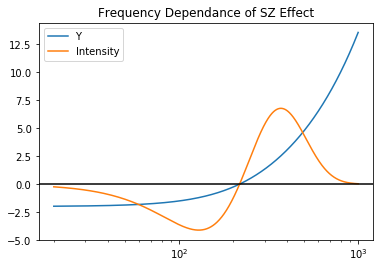

In [11]:
freq_range = np.arange(20,1000,1)
x = freq_range/56.85
y_param = [(ex/np.tanh(ex/2) - 4) for ex in x]
plt.semilogx(freq_range,y_param,label='Y')
I_v = [(ex**4 * np.exp(ex))/(np.exp(ex)-1)**2 * (ex/np.tanh(ex/2) - 4) for ex in x]
plt.semilogx(freq_range,I_v,label='Intensity')
plt.axhline(0, color='black')
plt.title('Frequency Dependance of SZ Effect')
plt.legend()

In [12]:
# map_150ghz_array = map_150ghz.getTOnly().map
# print(type(map_150ghz))

In [13]:
# freq_scaling = convert_ghz_to_y(150)-convert_ghz_to_y(90)
# print(freq_scaling)
# freq_scaling_fac = 1.0/freq_scaling
# print(freq_scaling_fac)

In [14]:
#y_map = sptpol_software.observation.sky.Map
# y_map = freq_scaling_fac*(map_150ghz-map_90ghz)
#/(convert_ghz_to_y(150)-convert_ghz_to_y(90))

In [15]:
# y_map.getSubmap([5,5], center_offset=[0,0], units='degree').drawImage(bw=True)
# print("Functionally a factor of 2 conversion, look at scale")
# diff_T.getSubmap([2,2], center_offset=[0,0], units='degree').drawImage(bw=False)
y_map_array = cmb.get_y_map([map_150ghz,map_90ghz],cal_factors,freqs_ghz)


In [16]:
# y_map.drawImage(bw=False,vmax=-0.00001,vmin=0.00001)

In [17]:
# np.shape(y_map)

In [18]:
# y_map.writeToHDF5('y_map.h5',overwrite=True,use_compression=False)
# y_map_array = y_map.getTOnly().map
print(y_map_array)
# np.save('y_map', y_map_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


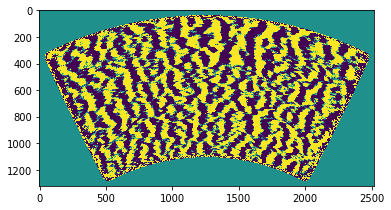

In [19]:
plt.imshow(y_map_array,vmax=0.00001,vmin=-0.00001)

In [20]:
# red_mapper_cat = fits.open("DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits")
from astropy.table import Table
dat = Table.read('DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits', format='fits')
df = dat.to_pandas()

In [21]:
# red_mapper_cat.info()
df

,ID,RA,DEC,ZREDMAGIC,ZREDMAGIC_E,weight
0,3050237433,76.650392,-56.996599,0.150009,0.009600,1.051875
1,3119536009,10.657494,-44.892612,0.150010,0.009513,0.911657
2,3043842585,81.917004,-56.612052,0.150013,0.008653,0.937038
3,3034628499,89.812164,-52.779491,0.150034,0.008681,1.076568
4,3059228029,71.135057,-51.074555,0.150044,0.008685,1.048341
5,3119296447,11.913672,-42.342889,0.150051,0.008591,0.963716
6,3081078666,52.842355,-57.074867,0.150058,0.008494,0.917235
7,3075699929,57.693299,-48.650024,0.150062,0.008151,0.892103
8,3090139698,43.089595,-43.859265,0.150065,0.009137,0.942256
9,3057872589,70.976981,-44.950415,0.150070,0.008823,0.953896


In [22]:
# com_dists = cosmo.comoving_distance(df['ZREDMAGIC']).to_value(u.Mpc)
df['COMOVING'] = pd.Series(cosmo.comoving_distance(df['ZREDMAGIC']).to_value(u.Mpc))
df['COMOVING_E'] = pd.Series(cosmo.comoving_distance(df['ZREDMAGIC_E']).to_value(u.Mpc))

In [23]:
# help(galaxy_pairs.getPairs)

In [24]:
# print(df)
pairs = galaxy_pairs.getPairs(df,20)
# First index is first item in pair
# Second index in second item in pair
# Third Index is distance apart from each other


In [25]:
pairs_df = pd.DataFrame(pairs.T,columns = ['galaxy_index_1','galaxy_index_2','Sep'])

In [26]:
# print(pairs)
pairs_df['galaxy_index_1'] = pairs_df.galaxy_index_1.astype(int)
pairs_df['galaxy_index_2'] = pairs_df.galaxy_index_2.astype(int)

In [27]:
pairs_df

,galaxy_index_1,galaxy_index_2,Sep
0,645602,645787,19.440705
1,651449,652553,12.694922
2,645787,647190,17.268397
3,649428,649606,13.064617
4,649348,649809,19.667827
5,649876,650136,12.081126
6,649876,651213,14.828850
7,649405,649876,8.673922
8,649405,650136,9.708314
9,649809,650136,17.977599


In [28]:
# import random
# index = random.randint(1,len(df))
# pos1 = [df['RA'][pairs_df['First_Loc'][index]],df['DEC'][pairs_df['First_Loc'][index]]]
# print(index)
# print(pos1)
# # pos2 = [df['RA'][pairs_df['Second_Loc'][0]],df['DEC'][pairs_df['Second_Loc'][0]]]
# # print(pos2)

In [29]:
# df.loc[index]

In [30]:
# # df.loc[pairs_df['Second_Loc'][0]]
# def SubtractRaDec(radec_1, radec_2):
# #     assert((len(radec_1) == 2)) #,"First enetered RaDec does not have two components")
# #     assert((len(radec_2) == 2)) #,"Second enetered RaDec does not have two components")

#     ra_1 = radec_1[0]
#     dec_1 = radec_1[1]
#     ra_2 = radec_2[0]
#     dec_2 = radec_2[1]
    
#     ra_diff = 180 - abs(abs(ra_1 - ra_2) - 180)
    
#     dec_diff = 180 - abs(abs(dec_1 - dec_2) - 180)
    
#     return([ra_diff,dec_diff])

In [31]:
# # rel_pos_1 = [0-pos1[0],-57.5-pos1[1]]
# rel_pos_1 = SubtractRaDec([0,-57.5],pos1)
# print(rel_pos_1)
# # print(rel_pos_1[0])
# # [15.089213,5.669675000000012]

In [32]:
# y_map.getSubmap([1,1], center_offset=[rel_pos_1[0],rel_pos_1[1]], units='degree').drawImage(bw=False)

In [33]:
# print(np.max(df['RA']))
# print(np.min(df['RA']))
# print(np.max(df['DEC']))
# print(np.min(df['DEC']))


In [34]:
# np.savetxt('pairs.csv',pairs.T,delimiter=',')

In [35]:
# vec1 = galaxy_pairs.get_vec_distances(df['RA'][int(pairs[0][0])],df['DEC'][int(pairs[0][0])],df['COMOVING'][int(pairs[0][0])])
# vec2 = galaxy_pairs.get_vec_distances(df['RA'][int(pairs[1][0])],df['DEC'][int(pairs[1][0])],df['COMOVING'][int(pairs[1][0])])
# print(galaxy_pairs.euclideanDistance(vec1,vec2,3))

In [ ]:
# df.to_csv('DES_REDMAGIC_Manipulatedo.csv')

In [ ]:
# vec_unit_test = RaDec2XYZ(df['RA'],df['DEC'])
# print(vec_unit_test)
# print(np.shape(vec_unit_test))
# vec_unit_test2 = vec_unit_test[0]
# print(vec_unit_test2)

In [ ]:
# help(sptpol_software.observation.sky.ang2Pix)

In [ ]:
# sptpol_software.observation.sky.ang2Pix(rel_pos_1,[0,-57.5],reso_arcmin=0.25,map_pixel_shape=[1320, 2520])

In [ ]:
# def get_subarray(array,centre, sqr_radius):
#     ''' 
#     Gets Sub Array with with an input centre and half width from an input Array
#     '''
#     x_cen = centre[0]
#     y_cen = centre[1]
#     sl_x = slice(x_cen-sqr_radius,x_cen+sqr_radius)
#     sl_y = slice(y_cen-sqr_radius,y_cen+sqr_radius)
    
#     return(array[sl_x,sl_y])

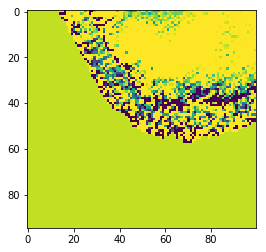

In [36]:
plt.imshow(galaxy_pairs.get_subarray(y_map_array,[1275,500],50),vmax=0.00001,vmin=-0.0001)

In [37]:
top_left_corner = np.array([330,52])
top_right_corner = np.array([330,2468])
bottom_right_corner = np.array([1275,2000])
bottom_left_corner = np.array([1275,2520-2000])

In [38]:
edges = np.vstack((top_left_corner,top_right_corner,bottom_left_corner,bottom_right_corner))

In [39]:
edges

array([[ 330,   52],
       [ 330, 2468],
       [1275,  520],
       [1275, 2000]])

In [46]:
temp1 = sptpol_software.observation.sky.pix2Ang(top_left_corner,np.array([0,-57.5]),reso_arcmin=1,map_pixel_shape=np.array([1320, 2520]))
# print(temp1[0]%360,temp1[1]%360)
# print(temp1)

In [47]:
sptpol_software.observation.sky.ang2Pix((0, -57.5),[0,-57.5],reso_arcmin=1,map_pixel_shape=np.array([1320,2520]))

([array([660]), array([1260])], (array([ True]), array([ True])))

In [48]:
temp2 = sptpol_software.observation.sky.pix2Ang(top_right_corner,np.array([0,-57.5]),reso_arcmin=1,map_pixel_shape=np.array([1320, 2520]))

In [49]:
temp3 = sptpol_software.observation.sky.pix2Ang(bottom_left_corner,np.array([0,-57.5]),reso_arcmin=1,map_pixel_shape=np.array([1320, 2520]))

In [50]:
temp4 = sptpol_software.observation.sky.pix2Ang(bottom_right_corner,np.array([0,-57.5]),reso_arcmin=1,map_pixel_shape=np.array([1320, 2520]))

In [51]:
edges_ang = np.array([temp1,temp2,temp3,temp4])
edges_ang = edges_ang.astype(int)
ra_range = np.array([edges_ang[0][0],edges_ang[1][0]])
dec_range = np.array([edges_ang[1][1],edges_ang[2][1]])
print(ra_range)
print(dec_range)

[-32  32]
[-52 -67]


In [52]:
# from ..constants import DTOR, RTOD
# def pixel_2_angle(pixel_coords,ra_dec_centre,reso_arcmin,map_pixel_shape):
    
    
#     pixel_coords = (y_coord, x_coord) = pixel_coords[0].astype(float), pixel_coords[1].astype(float)
#     n_pixels = map_pixel_shape.astype(float)
    
#     y_coord = (y_coord + 0.5 - 0.5 * n_pixels[0]) * reso_arcmin / 60
#     x_coord = (x_coord + 0.5 - 0.5 * n_pixels[1]) * reso_arcmin / 60
    
    

In [53]:
# print(max(df['RA']))
# print(min(df['RA']))
# print(max(df['DEC']))
# print(min(df['DEC']))


In [54]:
new_df = df[(df.DEC < dec_range[0]) & (df.DEC > dec_range[1]) & (df.RA > ra_range[0]) & (df.RA < ra_range[1])]
new_df = new_df.reset_index(drop=True)

In [55]:
cut_pairs = galaxy_pairs.getPairs(new_df,20)
cut_pairs_df = pd.DataFrame(cut_pairs.T,columns = ['galaxy_index_1','galaxy_index_2','Sep'])
cut_pairs_df['galaxy_index_1'] = cut_pairs_df.galaxy_index_1.astype(int)
cut_pairs_df['galaxy_index_2'] = cut_pairs_df.galaxy_index_2.astype(int)
cut_pairs_df

,galaxy_index_1,galaxy_index_2,Sep
0,40214,40365,14.121674
1,40140,40365,16.313739
2,40140,40214,14.083859
3,39784,40140,16.115064
4,39580,39637,18.898123
5,40072,40365,17.283868
6,39637,39915,14.026145
7,39915,40286,18.754300
8,40286,40341,12.612021
9,39637,39818,8.902526


In [56]:
help(galaxy_pairs.get_subarray)

Help on function get_subarray in module galaxy_pairs:

get_subarray(array, centre, sqr_radius)
    Gets Sub Array with with an input centre in array space and half width from an input Array



In [40]:
def get_midpoint(ra_dec_1, ra_dec_2):
    '''
    Find the midpoint between two points in array space
    '''
    pt1 = sptpol_software.observation.sky.ang2Pix(
        ra_dec_1, [0, -57.5], reso_arcmin=1, map_pixel_shape=np.array([1320, 2520]))
    pt2 = sptpol_software.observation.sky.ang2Pix(
        ra_dec_2, [0, -57.5], reso_arcmin=1, map_pixel_shape=np.array([1320, 2520]))

    X1 = float(pt1[0][0])
    X2 = float(pt2[0][0])

    Y1 = float(pt1[0][1])
    Y2 = float(pt2[0][1])

    return(((X1 + X2) / 2., (Y1 + Y2) / 2.))

In [57]:
def cut_out_pair(pair,y_map,galaxy_catalogue):
    '''
    Takes an input pair and a Compton Y-Map, and extract the pair as a sub map
    '''
    first_point = pair[0]
    second_point = pair[1]
    
    ra_1 = galaxy_catalogue.loc[first_point]['RA']
    dec_1 = galaxy_catalogue.loc[first_point]['DEC']
    
    ra_2 = galaxy_catalogue.loc[second_point]['RA']
    dec_2 = galaxy_catalogue.loc[second_point]['DEC']
    
    point_1 = (ra_1,dec_1)
    point_2 = (ra_2,dec_2)
    
    midpoint = get_midpoint(point_1,point_2)
    print(np.array(midpoint).astype(int))
    midpoint = np.array(midpoint).astype(int)
    return(galaxy_pairs.get_subarray(y_map,midpoint,50))
    
    

In [58]:
test_pair = [cut_pairs_df.loc[1000]['galaxy_index_1'],cut_pairs_df.loc[1000]['galaxy_index_2']]

In [59]:
test_pair

[33652.0, 33743.0]

In [60]:
def stack_pairs(y_map, galaxy_catalogue, pairs):
    '''
    Take input Y-map, galaxy catalogue, and list of pairs, and stacks them on top of each other
    returning a stacked array
    '''
    size_of_cutout = 60
    output = np.ndarray([int(size_of_cutout / 2.), int(size_of_cutout / 2.)])
    for index, row in pairs.iterrows():
        galaxy_1 = row['galaxy_index_1']
        galaxy_2 = row['galaxy_index_2']
        pair = [galaxy_1, galaxy_2]

        cut_array = galaxy_pairs.cut_out_pair(pair, y_map,
                                 galaxy_catalogue, int(size_of_cutout / 2.))

        gal_1_coords = galaxy_pairs.extract_ra_dec(galaxy_1,galaxy_catalogue)
        gal_2_coords = galaxy_pairs.extract_ra_dec(galaxy_2,galaxy_catalogue)

        angle = galaxy_pairs.get_rotn_angle(gal_1_coords,gal_2_coords)
        rot_array = sp.ndimage.rotate(cut_array, angle, reshape=False)
        output += rot_array

    return(output)


In [97]:
gal_coords_1 = galaxy_pairs.extract_ra_dec(cut_pairs_df.loc[100]['galaxy_index_1'],df)
gal_coords_2 = galaxy_pairs.extract_ra_dec(cut_pairs_df.loc[100]['galaxy_index_2'],df)
print(gal_coords_1)
print(gal_coords_2)
print(cut_pairs_df.loc[100])
print(df.loc[38518])
print(df.loc[38780])

(63.212844999999994, -54.519726999999996)
(35.895430999999995, -47.203914999999995)
galaxy_index_1    38518.000000
galaxy_index_2    38780.000000
Sep                  14.140171
Name: 100, dtype: float64
ID             3.068354e+09
RA             6.321284e+01
DEC           -5.451973e+01
ZREDMAGIC      2.584871e-01
ZREDMAGIC_E    1.717188e-02
weight         9.868031e-01
COMOVING       1.072992e+03
COMOVING_E     7.569299e+01
x_vec          2.806768e+02
y_vec          5.559554e+02
z_vec         -8.737538e+02
Name: 38518, dtype: float64
ID             3.097687e+09
RA             3.589543e+01
DEC           -4.720391e+01
ZREDMAGIC      2.590341e-01
ZREDMAGIC_E    1.526249e-02
weight         9.266251e-01
COMOVING       1.075109e+03
COMOVING_E     6.730655e+01
x_vec          5.917045e+02
y_vec          4.282507e+02
z_vec         -7.888896e+02
Name: 38780, dtype: float64


In [82]:
def get_rotn_angle(ra_dec_1, ra_dec_2):
    '''
    Return angle needed to rotate array based on dot-product of ra_dec vectors
    '''
    pt1 = sptpol_software.observation.sky.ang2Pix(
        ra_dec_1, [0, -57.5], reso_arcmin=1, map_pixel_shape=np.array([1320, 2520]))
    pt2 = sptpol_software.observation.sky.ang2Pix(
        ra_dec_2, [0, -57.5], reso_arcmin=1, map_pixel_shape=np.array([1320, 2520]))

    X1 = pt1[0][0][0]
    X2 = pt2[0][0][0]

    Y1 = pt1[0][1][0]
    Y2 = pt2[0][1][0]

    m = (Y2 - Y1) / (X2 - X1)

    return(np.arctan(m))


In [94]:
pt_1 = sptpol_software.observation.sky.ang2Pix(gal_coords_1, [0, -57.5], reso_arcmin=1, map_pixel_shape=np.array([1320, 2520]))
pt_2 = sptpol_software.observation.sky.ang2Pix(gal_coords_2, [0, -57.5], reso_arcmin=1, map_pixel_shape=np.array([1320, 2520]))
print(pt_1)
print(pt_2)


([array([481]), array([3461])], (array([ True]), array([False])))
([array([42]), array([2723])], (array([ True]), array([False])))


In [60]:
help(galaxy_pairs.extract_ra_dec)

Help on function extract_ra_dec in module galaxy_pairs:

extract_ra_dec(galaxy_index, galaxy_catalogue)
    Takes input galaxy index from get_pairs, and returns corresponding RA and DEC



In [58]:
output = stack_pairs(y_map_array,df,cut_pairs_df)

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

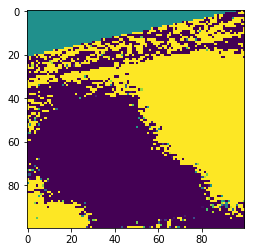

In [46]:
plt.imshow(galaxy_pairs.cut_out_pair(test_pair,y_map_array,df),vmax=0.000001,vmin=-0.000001)